# DenseNet121(Baseline)

In [4]:
# DenseNet with Three Augmentation Strategies - Step-by-step Execution

import torch
import torch.nn as nn
from torchvision.models import densenet121, DenseNet121_Weights
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys

In [5]:
# Append dataset module path
sys.path.append(os.path.abspath(".."))
from dataset import create_dataloaders

In [6]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [7]:
# Define function to evaluate validation accuracy
def evaluate_accuracy(model, data_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [8]:
# Set augmentation strategies
strategies = ['minimal', 'default', 'extensive']
all_reports = []
all_class_names = None


=== Running strategy: minimal ===
Epoch 1/10 | Loss: 97.0423 | Train Acc: 0.8692 | Val Acc: 0.8746 | Val Loss: 30.3255
Epoch 2/10 | Loss: 47.0574 | Train Acc: 0.9353 | Val Acc: 0.9033 | Val Loss: 25.5344
Epoch 3/10 | Loss: 36.3736 | Train Acc: 0.9460 | Val Acc: 0.8700 | Val Loss: 32.5901
Epoch 4/10 | Loss: 25.3223 | Train Acc: 0.9653 | Val Acc: 0.9042 | Val Loss: 24.8660
Epoch 5/10 | Loss: 25.5165 | Train Acc: 0.9643 | Val Acc: 0.8896 | Val Loss: 28.5940
Epoch 6/10 | Loss: 20.7339 | Train Acc: 0.9712 | Val Acc: 0.9117 | Val Loss: 23.7502
Epoch 7/10 | Loss: 19.1598 | Train Acc: 0.9722 | Val Acc: 0.9221 | Val Loss: 20.1191
Epoch 8/10 | Loss: 16.4202 | Train Acc: 0.9757 | Val Acc: 0.8488 | Val Loss: 43.5529
Epoch 9/10 | Loss: 16.0401 | Train Acc: 0.9761 | Val Acc: 0.9292 | Val Loss: 18.3427
Epoch 10/10 | Loss: 15.5646 | Train Acc: 0.9774 | Val Acc: 0.8933 | Val Loss: 29.5906
Plotting training history...


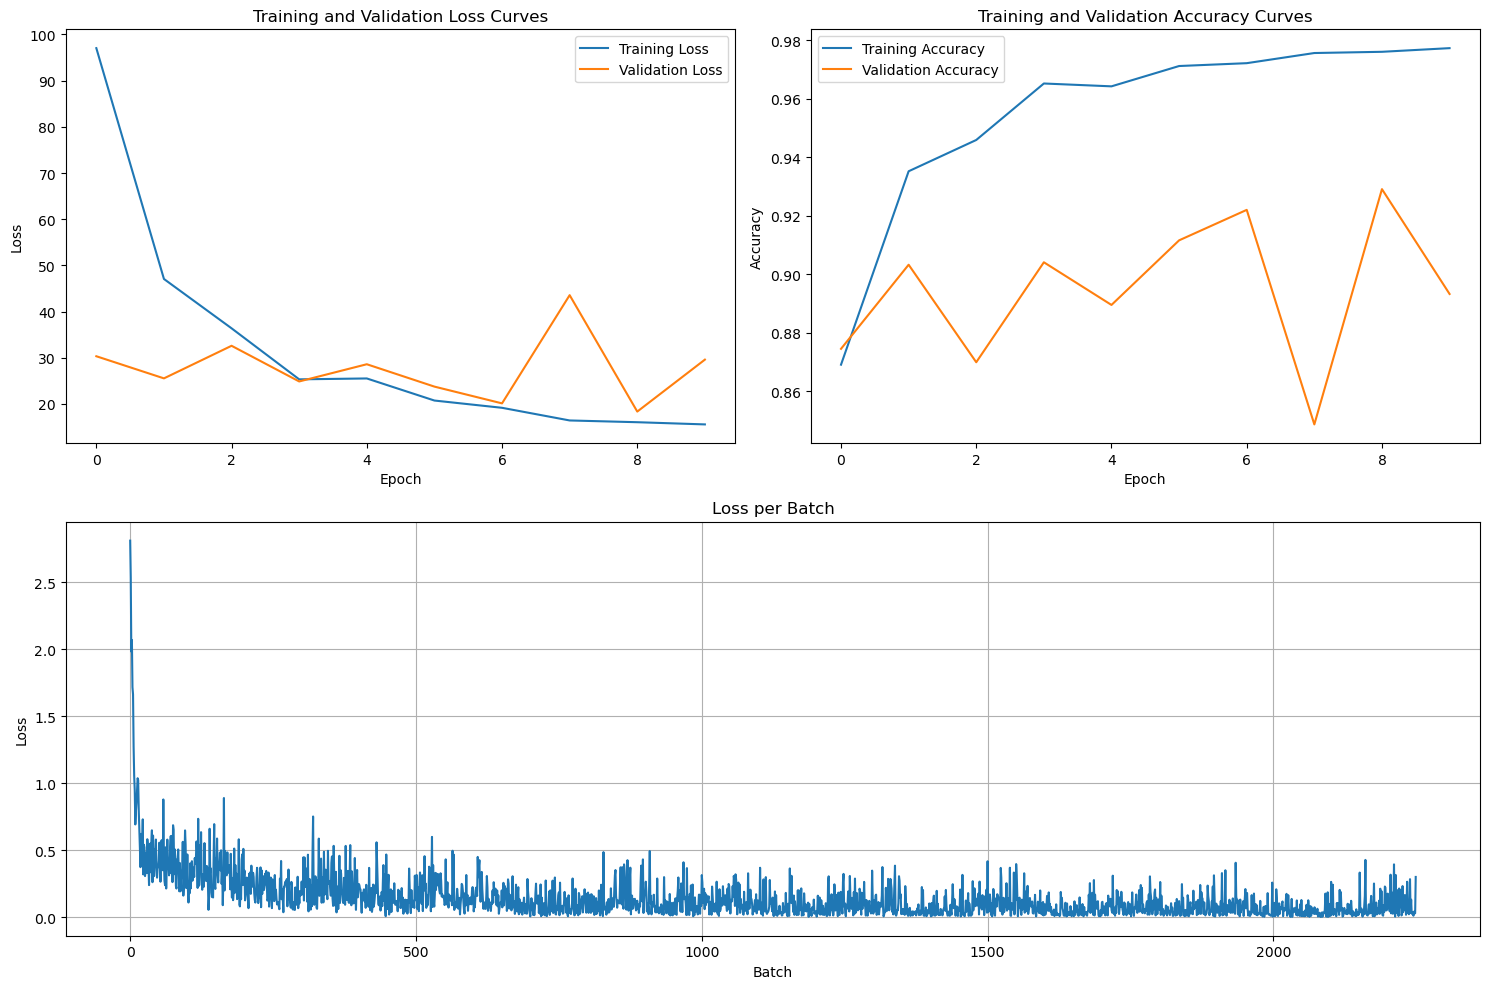

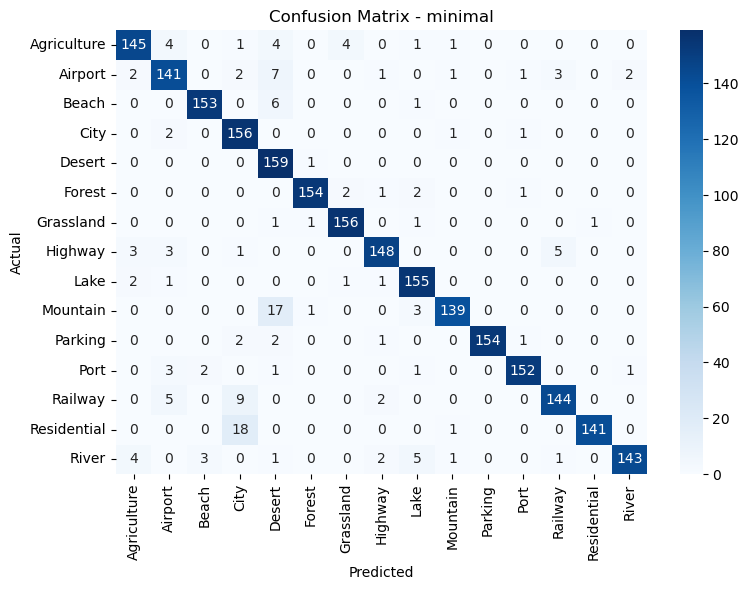


=== Running strategy: default ===
Epoch 1/10 | Loss: 159.8718 | Train Acc: 0.7792 | Val Acc: 0.8104 | Val Loss: 47.3716
Epoch 2/10 | Loss: 93.8128 | Train Acc: 0.8661 | Val Acc: 0.8604 | Val Loss: 33.6905
Epoch 3/10 | Loss: 79.7890 | Train Acc: 0.8871 | Val Acc: 0.8533 | Val Loss: 35.7963
Epoch 4/10 | Loss: 69.3653 | Train Acc: 0.9029 | Val Acc: 0.8921 | Val Loss: 29.1361
Epoch 5/10 | Loss: 62.8522 | Train Acc: 0.9028 | Val Acc: 0.8846 | Val Loss: 29.2041
Epoch 6/10 | Loss: 55.6489 | Train Acc: 0.9210 | Val Acc: 0.8387 | Val Loss: 42.6980
Epoch 7/10 | Loss: 53.5614 | Train Acc: 0.9239 | Val Acc: 0.8912 | Val Loss: 30.3939
Epoch 8/10 | Loss: 50.5067 | Train Acc: 0.9267 | Val Acc: 0.9012 | Val Loss: 26.9848
Epoch 9/10 | Loss: 48.7358 | Train Acc: 0.9313 | Val Acc: 0.8850 | Val Loss: 31.4511
Epoch 10/10 | Loss: 42.1635 | Train Acc: 0.9400 | Val Acc: 0.8938 | Val Loss: 30.4636
Plotting training history...


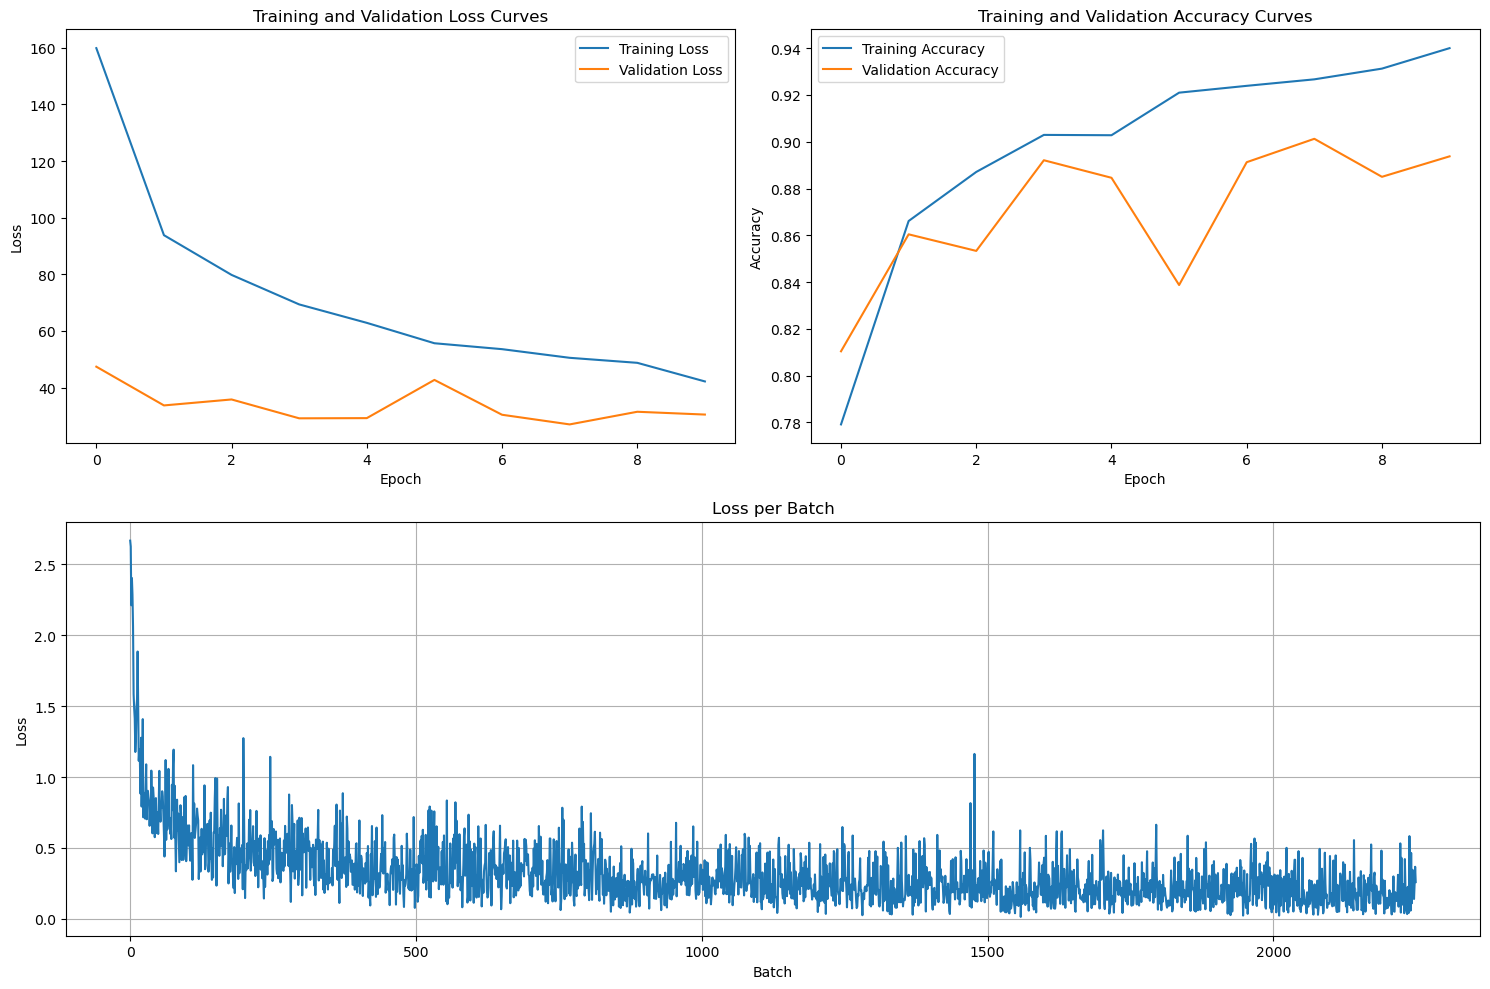

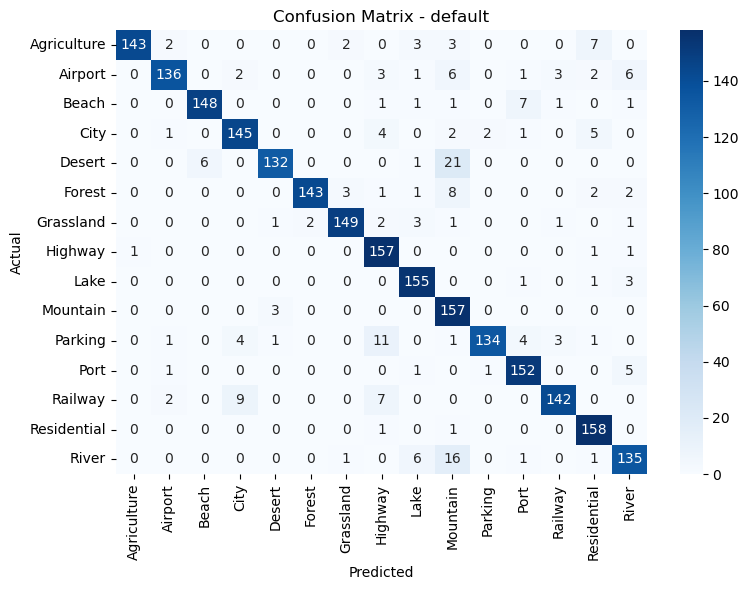


=== Running strategy: extensive ===
Epoch 1/10 | Loss: 196.6120 | Train Acc: 0.7214 | Val Acc: 0.7446 | Val Loss: 67.6610
Epoch 2/10 | Loss: 127.4518 | Train Acc: 0.8171 | Val Acc: 0.7929 | Val Loss: 57.8001
Epoch 3/10 | Loss: 109.8967 | Train Acc: 0.8401 | Val Acc: 0.8346 | Val Loss: 47.8616
Epoch 4/10 | Loss: 96.2991 | Train Acc: 0.8592 | Val Acc: 0.8204 | Val Loss: 48.9054
Epoch 5/10 | Loss: 88.4419 | Train Acc: 0.8711 | Val Acc: 0.8608 | Val Loss: 38.3409
Epoch 6/10 | Loss: 84.7467 | Train Acc: 0.8776 | Val Acc: 0.8667 | Val Loss: 35.7487
Epoch 7/10 | Loss: 81.7278 | Train Acc: 0.8821 | Val Acc: 0.8800 | Val Loss: 31.6040
Epoch 8/10 | Loss: 75.4649 | Train Acc: 0.8876 | Val Acc: 0.8333 | Val Loss: 53.4778
Epoch 9/10 | Loss: 65.0578 | Train Acc: 0.9053 | Val Acc: 0.8538 | Val Loss: 39.0236
Epoch 10/10 | Loss: 72.7832 | Train Acc: 0.8946 | Val Acc: 0.8758 | Val Loss: 34.4930
Plotting training history...


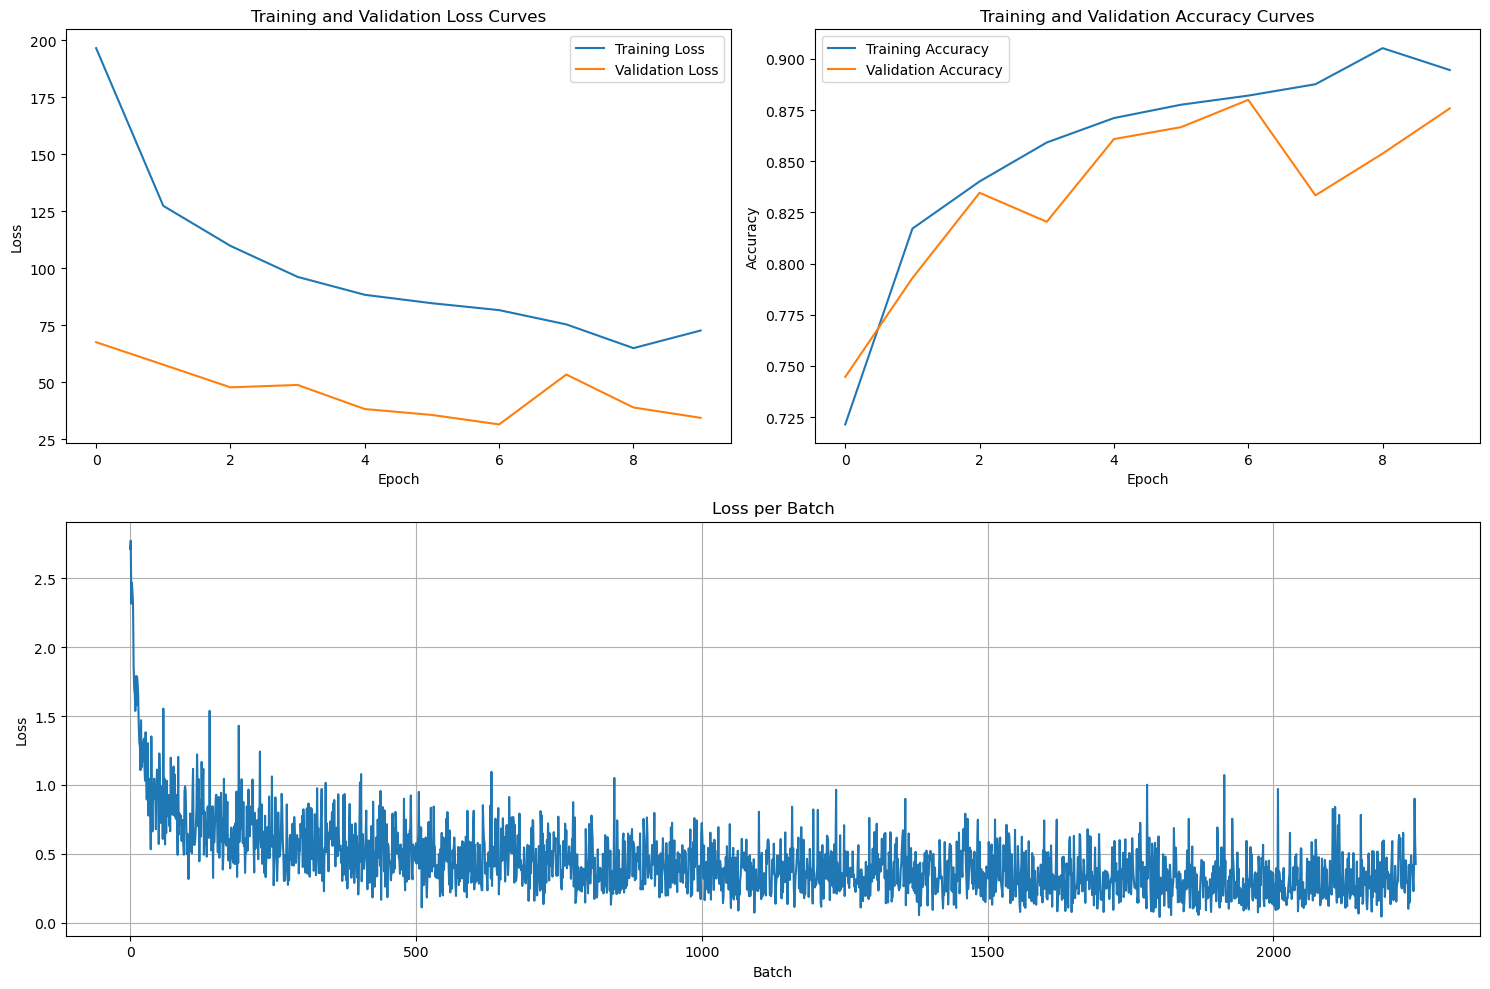

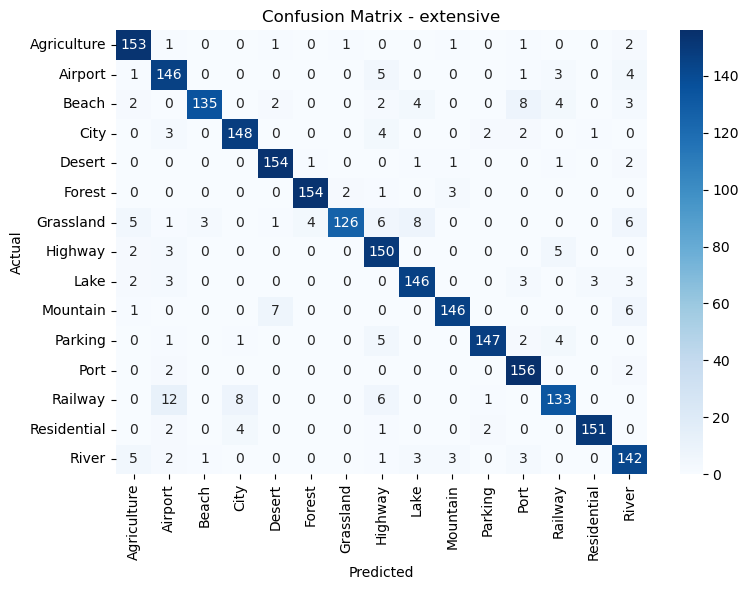

In [9]:
# Run training and evaluation for each strategy
for strategy in strategies:
    print(f"\n=== Running strategy: {strategy} ===")

    # Load data
    train_loader, val_loader, test_loader, class_names = create_dataloaders(
        root_dir=os.path.abspath(os.path.join("..", "Aerial_Landscapes")),
        batch_size=32,
        augmentation_strategy=strategy,
        verbose=False
    )
    if all_class_names is None:
        all_class_names = class_names

    # Load model
    weights = DenseNet121_Weights.DEFAULT
    model = densenet121(weights=weights)
    model.classifier = nn.Linear(model.classifier.in_features, len(class_names))
    model = model.to(device)

    # Train model
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
    best_val_acc = 0.0
    best_model_state = None
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [], 'batch_losses': []}

    for epoch in range(10):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            history['batch_losses'].append(loss.item())
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        history['train_loss'].append(running_loss)
        history['train_acc'].append(train_acc)

        # Evaluate validation loss and accuracy
        model.eval()
        val_loss = 0.0
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                val_correct += (preds == labels).sum().item()
                val_total += labels.size(0)

        val_acc = val_correct / val_total
        history['val_acc'].append(val_acc)
        history['val_loss'].append(val_loss)

        print(f"Epoch {epoch+1}/10 | Loss: {running_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_state = model.state_dict()

    os.makedirs("saved_models", exist_ok=True)
    torch.save(best_model_state, f"saved_models/best_model_{strategy}.pth")
    model.load_state_dict(best_model_state)

    # Evaluate on test set
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            y_pred.extend(preds)
            y_true.extend(labels.numpy())

    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    all_reports.append((strategy, report))

    print("Plotting training history...")
    plt.figure(figsize=(15, 10))

    # Loss curve
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curves')
    plt.legend()

    # Accuracy curve
    plt.subplot(2, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy Curves')
    plt.legend()

    # Per-batch loss curve
    plt.subplot(2, 1, 2)
    plt.plot(range(len(history['batch_losses'])), history['batch_losses'])
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Loss per Batch')
    plt.grid(True)

    plt.tight_layout()
    os.makedirs("figures", exist_ok=True)
    plt.savefig(f'figures/training_history_{strategy}.png')
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {strategy}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

In [13]:
raw_metric_names = ['precision', 'recall', 'f1-score']
display_names = ['Precision', 'Recall', 'F1']
columns = pd.MultiIndex.from_product([strategies, display_names])
final_table = pd.DataFrame(index=all_class_names, columns=columns)

for strategy, report in all_reports:
    df = pd.DataFrame(report).transpose()
    df = df.loc[all_class_names]
    for raw, disp in zip(raw_metric_names, display_names):
        final_table[(strategy, disp)] = df[raw]

styled = final_table.style.set_table_styles([
    {"selector": "th", "props": [("text-align", "center")]},
    {"selector": "th.col_level0", "props": [("text-align", "center")]},
    {"selector": "th.col_level1", "props": [("text-align", "center")]},
    {"selector": "td", "props": [("text-align", "center")]}
]).set_properties(**{'text-align': 'center'})

display(styled.format(precision=3))
